In [15]:
import numpy as np
import pandas
import math
import matplotlib.pyplot as plt

In [16]:
Data = pandas.read_csv('Datasets/banknote/data_banknote_authentication.csv')
Data = Data.to_numpy()

In [17]:
Data[0:10, :]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ,  0.     ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ,  0.     ],
       [ 4.3684 ,  9.6718 , -3.9606 , -3.1625 ,  0.     ],
       [ 3.5912 ,  3.0129 ,  0.72888,  0.56421,  0.     ],
       [ 2.0922 , -6.81   ,  8.4636 , -0.60216,  0.     ],
       [ 3.2032 ,  5.7588 , -0.75345, -0.61251,  0.     ],
       [ 1.5356 ,  9.1772 , -2.2718 , -0.73535,  0.     ]])

In [18]:
m, n = Data.shape
n0 = n - 1

In [19]:
print(m, n, n0)

1372 5 4


In [20]:
randseq = np.random.permutation(m)
Data = Data[randseq[0:m], 0:n]

In [21]:
Data[0:10, :]

array([[-3.7181  , -8.5089  , 12.363   , -0.95518 ,  1.      ],
       [-1.8391  , -9.0883  ,  9.2416  , -0.10432 ,  1.      ],
       [ 3.9382  ,  0.9291  ,  0.78543 ,  0.6767  ,  0.      ],
       [-0.83535 ,  0.80494 , -1.6411  , -0.19225 ,  1.      ],
       [ 2.6799  ,  3.1349  ,  0.34073 ,  0.58489 ,  0.      ],
       [ 1.9476  , -4.7738  ,  8.527   , -1.8668  ,  0.      ],
       [ 5.2423  , 11.0272  , -4.353   , -4.1013  ,  0.      ],
       [ 0.22432 , -0.52147 , -0.40386 ,  1.2017  ,  1.      ],
       [-1.2528  , 10.2036  ,  2.1787  , -5.6038  ,  0.      ],
       [ 1.5673  ,  7.9274  , -0.056842, -2.1694  ,  0.      ]])

In [22]:
train_num = math.floor(m*0.8)
test_num = m - train_num

In [23]:
print(train_num, test_num)

1097 275


In [24]:
x_train = Data[0:train_num, 0:n0].T
y_train = Data[0:train_num, n0]

x_test = Data[train_num:m+1, 0:n0].T
y_test = Data[train_num:m+1, n0]

In [25]:
x_train[:, 0:6]

array([[-3.7181 , -1.8391 ,  3.9382 , -0.83535,  2.6799 ,  1.9476 ],
       [-8.5089 , -9.0883 ,  0.9291 ,  0.80494,  3.1349 , -4.7738 ],
       [12.363  ,  9.2416 ,  0.78543, -1.6411 ,  0.34073,  8.527  ],
       [-0.95518, -0.10432,  0.6767 , -0.19225,  0.58489, -1.8668 ]])

In [26]:
# Non linear sigmoid activation function
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

In [27]:
L = 4
neurons = np.array([n0, 5, 5, 1])

# initial model
W1 = np.random.randn(neurons[1],neurons[0])
b1 = np.random.randn(neurons[1],1)

W2 = np.random.randn(neurons[2],neurons[1])
b2 = np.random.randn(neurons[2],1)

W3 = np.random.randn(neurons[3],neurons[2])
b3 = np.random.randn(neurons[3],1)


In [29]:
b1

array([[ 1.56953301],
       [ 0.76999026],
       [-1.56757823],
       [ 0.26313801],
       [-1.99349744]])

In [30]:
# Hyper paramters
learning_rate = 0.01
iterations = 2000

# Initializing variables
Z1 = np.zeros([neurons[1], train_num])
A1 = np.zeros([neurons[1], train_num])

Z2 = np.zeros([neurons[2], train_num])
A2 = np.zeros([neurons[2], train_num])

Z3 = np.zeros([neurons[3], train_num])
A3 = np.zeros([neurons[3], train_num])

In [32]:
# Training
train_loss = np.zeros((iterations,1))
train_accuracy = np.zeros((iterations,1))

for i in range(iterations):

    # Forward Propagation
    Z1 = np.dot(W1, x_train) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Metrics computation
    pred_train = A3 > 0.5
    train_accuracy[i] = 1 - np.sum(abs(pred_train - y_train))/train_num   

    train_loss[i] = (-1/train_num)*np.sum(y_train*np.log(A3) + (1-y_train)*np.log(1-A3))

    print(f'Iteration: {i+1}, Loss: {train_loss[i]}, Accuracy: {train_accuracy[i]}')

    # Backward Propagation
    dZ3 = A3-y_train
    dW3 = (1/train_num)*np.dot(dZ3, A2.T)
    db3 = (1/train_num)*np.sum(dZ3, axis = 1, keepdims = True)

    dA2 = A2*(1-A2)
    dZ2 = np.dot(W3.T, dZ3)*dA2
    dW2 = (1/train_num)*np.dot(dZ2, A1.T)
    db2 = (1/train_num)*np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = A1*(1-A1)
    dZ1 = np.dot(W2.T, dZ2)*dA1
    dW1 = (1/train_num)*np.dot(dZ1, x_train.T)
    db1 = (1/train_num)*np.sum(dZ1, axis = 1, keepdims = True)

    # Model updates
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1

    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3

Iteration: 1, Loss: [0.61729613], Accuracy: [0.73199635]
Iteration: 2, Loss: [0.61723311], Accuracy: [0.73199635]
Iteration: 3, Loss: [0.61717013], Accuracy: [0.73199635]
Iteration: 4, Loss: [0.61710718], Accuracy: [0.73199635]
Iteration: 5, Loss: [0.61704427], Accuracy: [0.73199635]
Iteration: 6, Loss: [0.61698139], Accuracy: [0.73199635]
Iteration: 7, Loss: [0.61691855], Accuracy: [0.73199635]
Iteration: 8, Loss: [0.61685574], Accuracy: [0.73199635]
Iteration: 9, Loss: [0.61679296], Accuracy: [0.73199635]
Iteration: 10, Loss: [0.61673021], Accuracy: [0.73381951]
Iteration: 11, Loss: [0.6166675], Accuracy: [0.73564266]
Iteration: 12, Loss: [0.61660482], Accuracy: [0.73564266]
Iteration: 13, Loss: [0.61654218], Accuracy: [0.73655424]
Iteration: 14, Loss: [0.61647956], Accuracy: [0.73746582]
Iteration: 15, Loss: [0.61641698], Accuracy: [0.73746582]
Iteration: 16, Loss: [0.61635443], Accuracy: [0.73928897]
Iteration: 17, Loss: [0.61629191], Accuracy: [0.74020055]
Iteration: 18, Loss: [0.

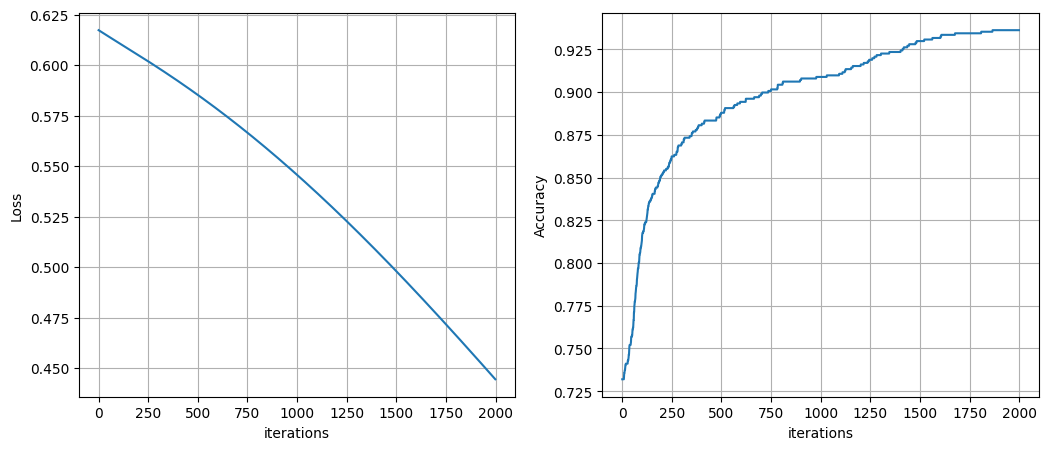

In [33]:
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Accuracy')

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()

In [34]:
# Forward Propagation
Z1 = np.dot(W1, x_test) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

Z3 = np.dot(W3, A2) + b3
A3 = sigmoid(Z3)

# Metrics computation
pred_test = A3 > 0.5
test_accuracy = 1 - np.sum(abs(pred_test - y_test))/test_num

print(test_accuracy)

0.9454545454545454
